# Advanced Numpy, Librosa, and Neural Networks Assignment
This assignment will guide you through advanced Numpy operations, basic and advanced usage of Librosa for audio processing, Fourier transforms, Butterworth filtering, and the creation of a simple Artificial Neuron using Python classes and objects.

## Part 1: Audio Signal Processing
In this section, you will learn how to load an audio file, perform Fourier Transform to analyze the signal in the frequency domain, apply a Butterworth filter, and visualize the results.

In [1]:
# Install necessary libraries
# Uncomment and run the next line to install libraries if they are not installed.
# pip install numpy librosa scipy matplotlib
import librosa
import numpy as np
import matplotlib.pyplot as plt
import librosa.display


### Step 1: Load the Audio Data
Use `librosa` to load the given audio file and visualize the waveform.

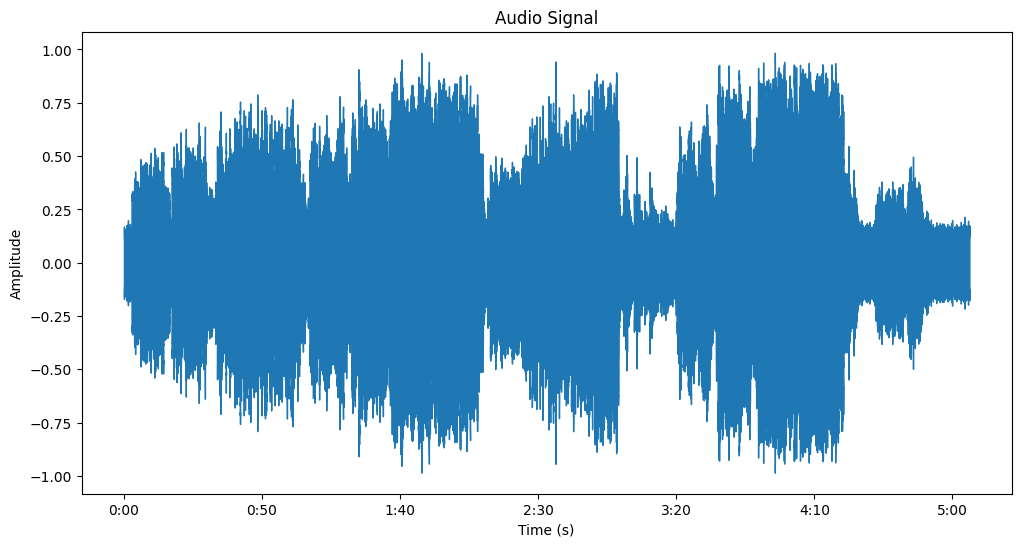

In [3]:
# Load the audio file 
audio_file = "sample_audio.wav" # Code goes here
y, sr = librosa.load(audio_file, sr=None)

# Plot the signal
plt.figure(figsize=(12, 6))
# Code goes here
librosa.display.waveshow(y, sr=sr)
plt.title('Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.show()

### Step 2: Perform Fourier Transform
Use Numpy's `fft` function to perform Fourier Transform on the audio signal and plot its frequency spectrum.

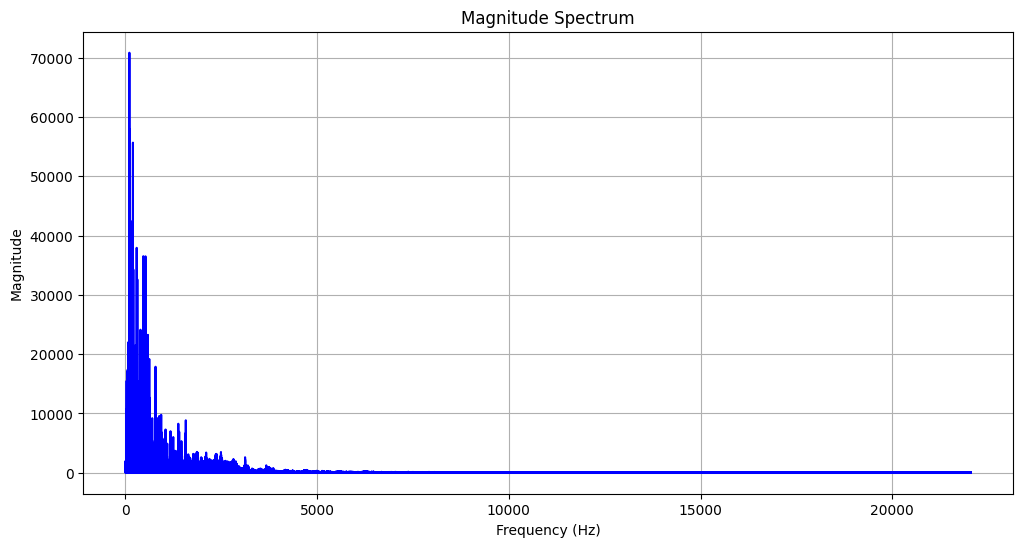

In [4]:
# Perform Fourier Transform on the signal
Y = np.fft.fft(y)
# Get frequency bins
frequencies = np.fft.fftfreq(len(y) , d=1/sr)
# Plot the magnitude spectrum
plt.figure(figsize=(12, 6))
# Code goes here
plt.plot(frequencies[:len(frequencies)//2], np.abs(Y[:len(Y)//2]), color='blue')
plt.title('Magnitude Spectrum')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

### Step 3: Apply a Butterworth Filter
Use a Butterworth filter to remove unwanted frequencies and plot the filtered signal, and save the audio as a .wav file, using the `soundfile` package.

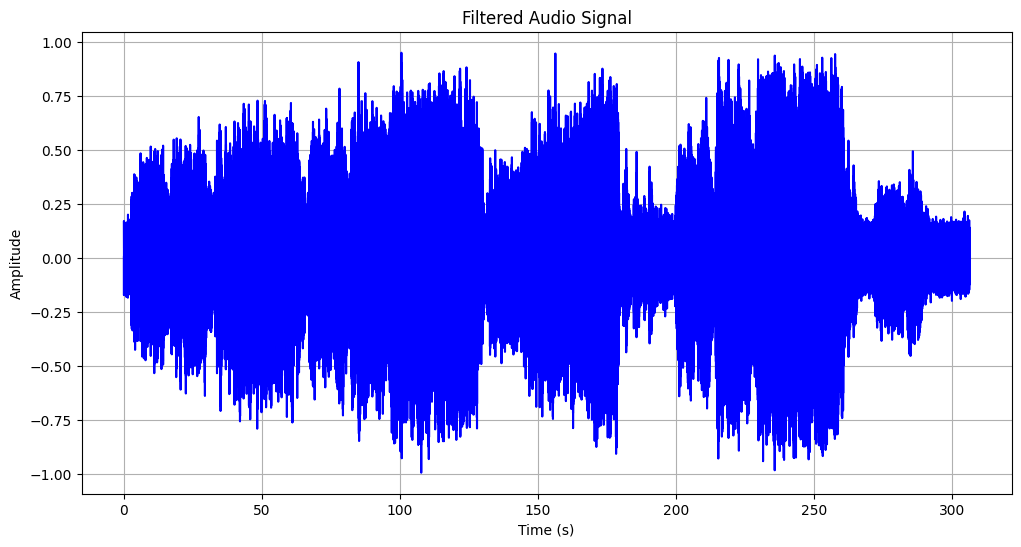

In [14]:
from scipy.signal import butter, filtfilt
import soundfile as sf

def butter_lowpass(cutoff, fs, order=5):
    nyquist = 0.5 * fs
    normal_cutoff = cutoff / nyquist
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

cutoff_frequency = 5000 # Use the best cutoff frequency that you get by trial and error
order = 6
# Filter the audio
b , a = butter_lowpass(cutoff_frequency , sr , order)
filtered_signal = filtfilt(b , a , y)
# Save the audio as "audio.wav"
sf.write("audio.wav" , filtered_signal , sr)

# Plot filtered audio signal
plt.figure(figsize=(12, 6))

plt.plot(np.linspace(0, len(filtered_signal) / sr, len(filtered_signal)), filtered_signal, color='blue')
plt.title('Filtered Audio Signal')
plt.xlabel('Time (s)')
plt.ylabel('Amplitude')
plt.grid()
plt.show()

### Step 4: Fourier Transform of the Filtered Signal
Apply Fourier Transform on the filtered signal and visualize the spectrum to compare it with the original signal.

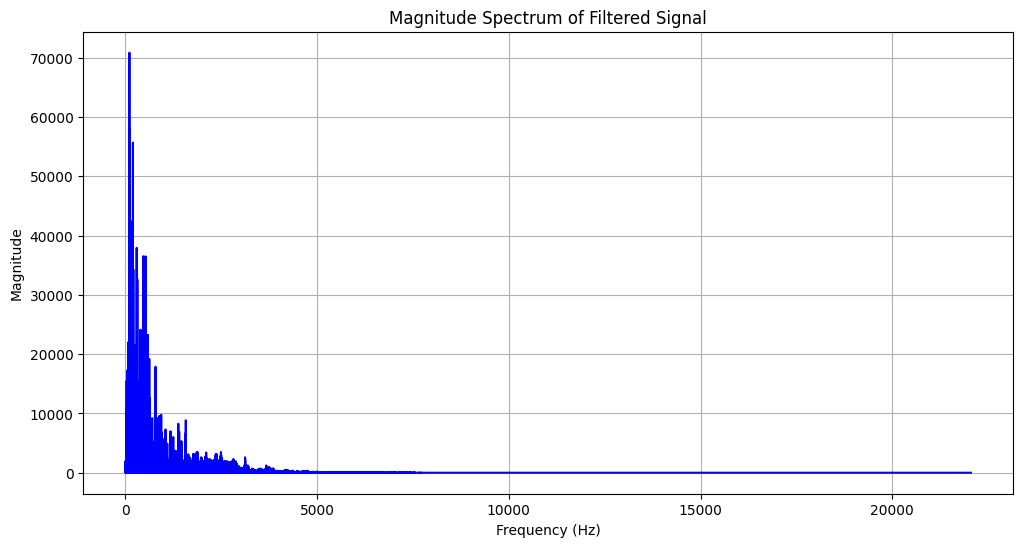

In [15]:
# Perform Fourier Transform on the filtered signal
filtered_fft = np.fft.fft(filtered_signal)
frequencies = np.fft.fftfreq(len(filtered_signal), d=1/sr)

# Plot the magnitude spectrum of the filtered signal
plt.figure(figsize=(12, 6))
plt.plot(frequencies[:len(frequencies)//2], np.abs(filtered_fft[:len(filtered_fft)//2]), color='blue')
plt.title('Magnitude Spectrum of Filtered Signal')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid()
plt.show()

## Part 2: Implementing a Simple Artificial Neuron
In this section, you will implement a basic Artificial Neuron using Python classes and objects.

In [18]:
import numpy as np
# Define a simple neuron class
class Neuron:
    def __init__(self, num_inputs, weights):
        self.weights = weights
        self.bias = 0
        
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def feedforward(self, inputs):
        weighted_sum = np.dot(inputs, self.weights) + self.bias
        return self.sigmoid(weighted_sum)

# Test the Neuron
weights = np.array([0.2, 0.4, 0.4])
neuron = Neuron(3, weights)
inputs = np.array([0.5, 0.3, 0.8])
output = neuron.feedforward(inputs)
print('Output from the neuron:', output)

Output from the neuron: 0.6318124177361016


### [Additional]
This is an implementation of a simple training function using gradient descent to update the weights and bias of the neuron.

In [19]:
class Neuron:
    def __init__(self, num_inputs, learning_rate=0.1):
        self.weights = np.random.rand(num_inputs)
        self.bias = np.random.rand(1)
        self.learning_rate = learning_rate
    def sigmoid(self, x):
        return 1 / (1 + np.exp(-x))
    def sigmoid_derivative(self, x):
        return x * (1 - x)
    def feedforward(self, inputs):
        self.inputs = inputs
        self.total_input = np.dot(inputs, self.weights) + self.bias
        self.output = self.sigmoid(self.total_input)
        return self.output
    def train(self, inputs, expected_output, epochs=1000):
        for epoch in range(epochs):
            output = self.feedforward(inputs)
            error = expected_output - output
            derror = error * self.sigmoid_derivative(output)
            self.weights += self.learning_rate * derror * inputs
            self.bias += self.learning_rate * derror